In [1]:
import numpy as np
import pandas as pd

In [2]:
file = pd.read_csv("unsupervised_data.csv")

In [3]:
file

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
0,1,-21.904591,-22.659091,12.805995,-46.631935,-34.347081,-21.989738
1,2,-28.662385,68.757081,31.761821,3.982259,-62.876866,-61.838563
2,3,-62.551204,60.909235,8.112918,24.110050,-64.372336,70.681940
3,4,14.428024,-48.326045,-65.576518,76.027549,69.966852,48.023953
4,5,9.780285,-55.643172,-72.737299,74.180123,67.873327,41.128015
...,...,...,...,...,...,...,...
39995,39996,19.126649,-53.397074,-73.297148,69.415535,75.729247,54.485823
39996,39997,-3.768855,-32.785832,22.813179,-50.865346,-36.385833,-28.710921
39997,39998,-10.519365,51.354702,-45.129637,1.941843,13.162370,-77.770009
39998,39999,47.122315,-47.272906,-47.184628,-52.908391,-29.804291,2.042820


In [4]:
features = ["Feature_1", "Feature_2", "Feature_3", "Feature_4", "Feature_5", "Feature_6"]

In [5]:
file = file.dropna(subset = features)

In [6]:
data = file[features].copy()

In [7]:
data

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
0,-21.904591,-22.659091,12.805995,-46.631935,-34.347081,-21.989738
1,-28.662385,68.757081,31.761821,3.982259,-62.876866,-61.838563
2,-62.551204,60.909235,8.112918,24.110050,-64.372336,70.681940
3,14.428024,-48.326045,-65.576518,76.027549,69.966852,48.023953
4,9.780285,-55.643172,-72.737299,74.180123,67.873327,41.128015
...,...,...,...,...,...,...
39995,19.126649,-53.397074,-73.297148,69.415535,75.729247,54.485823
39996,-3.768855,-32.785832,22.813179,-50.865346,-36.385833,-28.710921
39997,-10.519365,51.354702,-45.129637,1.941843,13.162370,-77.770009
39998,47.122315,-47.272906,-47.184628,-52.908391,-29.804291,2.042820


In [8]:
data = (data - data.min()) / (data.max() - data.min()) * 9 + 1

In [9]:
data.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.412767,5.270118,5.883221,5.200332,4.456453,5.333644
std,1.877233,2.510775,2.361889,2.135844,2.177251,2.269789
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.433935,3.051706,3.508383,2.930607,2.842219,3.168391
50%,5.293422,3.908893,7.109374,5.281456,3.872771,5.314153
75%,6.562263,7.927320,7.937284,6.611978,5.958119,7.502186
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
0,4.753119,4.327519,7.178490,2.750205,3.932893,4.426550
1,4.392272,8.660906,8.289548,5.368656,2.614692,2.526940
2,2.582704,8.288895,6.903415,6.409938,2.545594,8.844246
3,6.693178,3.110832,2.584259,9.095813,8.752655,7.764131
4,6.445002,2.763980,2.164544,9.000239,8.655925,7.435399


In [11]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample().iloc[0]))
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)

In [12]:
centroids = random_centroids(data, 5)

In [13]:
centroids

,0,1,2,3,4
Feature_1,6.339207,5.184762,5.741716,6.008698,3.489882
Feature_2,8.468998,8.441291,7.167375,8.338148,2.613393
Feature_3,8.431095,7.736473,1.900157,8.041906,7.699533
Feature_4,2.323559,9.287899,7.253589,5.630514,2.557173
Feature_5,3.990807,2.647242,2.852028,3.479038,3.120315
Feature_6,9.487639,1.821356,5.225794,9.203328,7.668176


In [14]:
distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
distances

,0,1,2,3,4
0,6.858320,8.282642,7.680523,7.051728,4.001395
1,7.966497,4.103844,7.467868,6.940328,8.504542
2,5.973160,8.068575,7.082980,3.826719,7.086984
3,11.598700,11.395787,7.904629,9.973458,10.543285
4,11.932358,11.513946,7.846831,10.348230,10.564174
...,...,...,...,...,...
39995,11.833184,12.062281,8.267136,10.364605,10.786661
39996,7.156135,8.583989,8.363436,7.486091,4.439847
39997,9.786442,6.659398,5.548889,9.014230,9.864323
39998,8.407878,10.884438,7.178415,8.705784,6.822646


In [15]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [16]:
labels = get_labels(data, centroids)

In [17]:
labels

0        4
1        1
2        3
3        2
4        2
        ..
39995    2
39996    4
39997    2
39998    4
39999    2
Length: 40000, dtype: int64

In [18]:
labels.value_counts()

2    14319
4    14251
1     5715
3     5715
Name: count, dtype: int64

In [19]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [20]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [21]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components = 2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

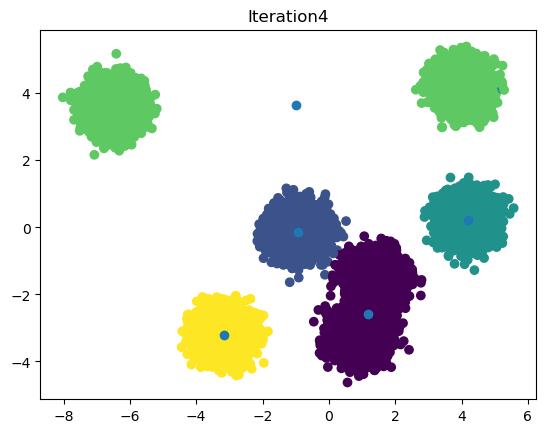

In [46]:
max_iterations = 100
k = 5

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1